In [19]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [20]:
df = pd.read_csv('./data/train_logs.csv')
target = pd.read_csv('./data/train_scores.csv')


In [21]:
df = df.merge(target)

In [22]:
df

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count,score
0,001519c8,1,4526,4557,31,Nonproduction,Leftclick,Leftclick,NoChange,0,0,3.5
1,001519c8,2,4558,4962,404,Nonproduction,Leftclick,Leftclick,NoChange,0,0,3.5
2,001519c8,3,106571,106571,0,Nonproduction,Shift,Shift,NoChange,0,0,3.5
3,001519c8,4,106686,106777,91,Input,q,q,q,1,1,3.5
4,001519c8,5,107196,107323,127,Input,q,q,q,2,1,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...
8405893,fff05981,3615,2063944,2064440,496,Nonproduction,Leftclick,Leftclick,NoChange,1031,240,4.0
8405894,fff05981,3616,2064497,2064497,0,Nonproduction,Shift,Shift,NoChange,1031,240,4.0
8405895,fff05981,3617,2064657,2064765,108,Replace,q,q,q => q,1031,240,4.0
8405896,fff05981,3618,2069186,2069259,73,Nonproduction,Leftclick,Leftclick,NoChange,1028,240,4.0


In [79]:
df.loc[0,'since_last'] = 0

In [83]:
for i in range(1, len(df)):
    if i % 10000 == 0: print(i)
    df.loc[i, 'since_last'] = max(0, df.loc[i, 'down_time'] - df.loc[i-1, 'up_time'])


10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
1390

In [84]:
df

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count,score,since_last
0,001519c8,1,4526,4557,31,Nonproduction,Leftclick,Leftclick,NoChange,0,0,3.5,0.0
1,001519c8,2,4558,4962,404,Nonproduction,Leftclick,Leftclick,NoChange,0,0,3.5,1.0
2,001519c8,3,106571,106571,0,Nonproduction,Shift,Shift,NoChange,0,0,3.5,101609.0
3,001519c8,4,106686,106777,91,Input,q,q,q,1,1,3.5,115.0
4,001519c8,5,107196,107323,127,Input,q,q,q,2,1,3.5,419.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8405893,fff05981,3615,2063944,2064440,496,Nonproduction,Leftclick,Leftclick,NoChange,1031,240,4.0,1389.0
8405894,fff05981,3616,2064497,2064497,0,Nonproduction,Shift,Shift,NoChange,1031,240,4.0,57.0
8405895,fff05981,3617,2064657,2064765,108,Replace,q,q,q => q,1031,240,4.0,160.0
8405896,fff05981,3618,2069186,2069259,73,Nonproduction,Leftclick,Leftclick,NoChange,1028,240,4.0,4421.0


In [97]:
dfAgg = df.groupby('id').aggregate({'event_id':'count','action_time':'mean','cursor_position':'mean','word_count':'max', 'score':'max', 'since_last':'mean'})

In [124]:
dfAgg.head()

,event_id,action_time,cursor_position,word_count,since_last
id,,,,,
001519c8,2557,116.246774,711.163473,256,598.823621
0022f953,2454,112.221271,776.205786,323,612.204564
0042269b,4136,101.837766,731.611702,404,342.973646
0059420b,1556,121.848329,542.537275,206,760.312339
0075873a,2531,123.943896,600.050968,252,512.708811


<Axes: >

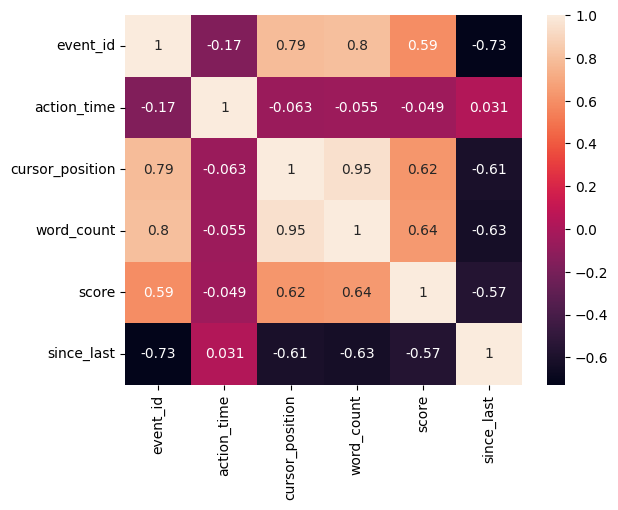

In [99]:
sns.heatmap(dfAgg.corr(),annot=True)

In [214]:
dfAgg

,event_id,action_time,cursor_position,word_count,since_last
id,,,,,
001519c8,2557,116.246774,711.163473,256,598.823621
0022f953,2454,112.221271,776.205786,323,612.204564
0042269b,4136,101.837766,731.611702,404,342.973646
0059420b,1556,121.848329,542.537275,206,760.312339
0075873a,2531,123.943896,600.050968,252,512.708811
...,...,...,...,...,...
ffb8c745,4739,105.437856,774.000633,461,278.446930
ffbef7e5,2604,82.266129,1022.078725,438,600.354455
ffccd6fd,3063,75.605615,1309.085537,201,556.621613


In [100]:
targ = dfAgg[['score']]
dfAgg = dfAgg.drop('score',axis=1)

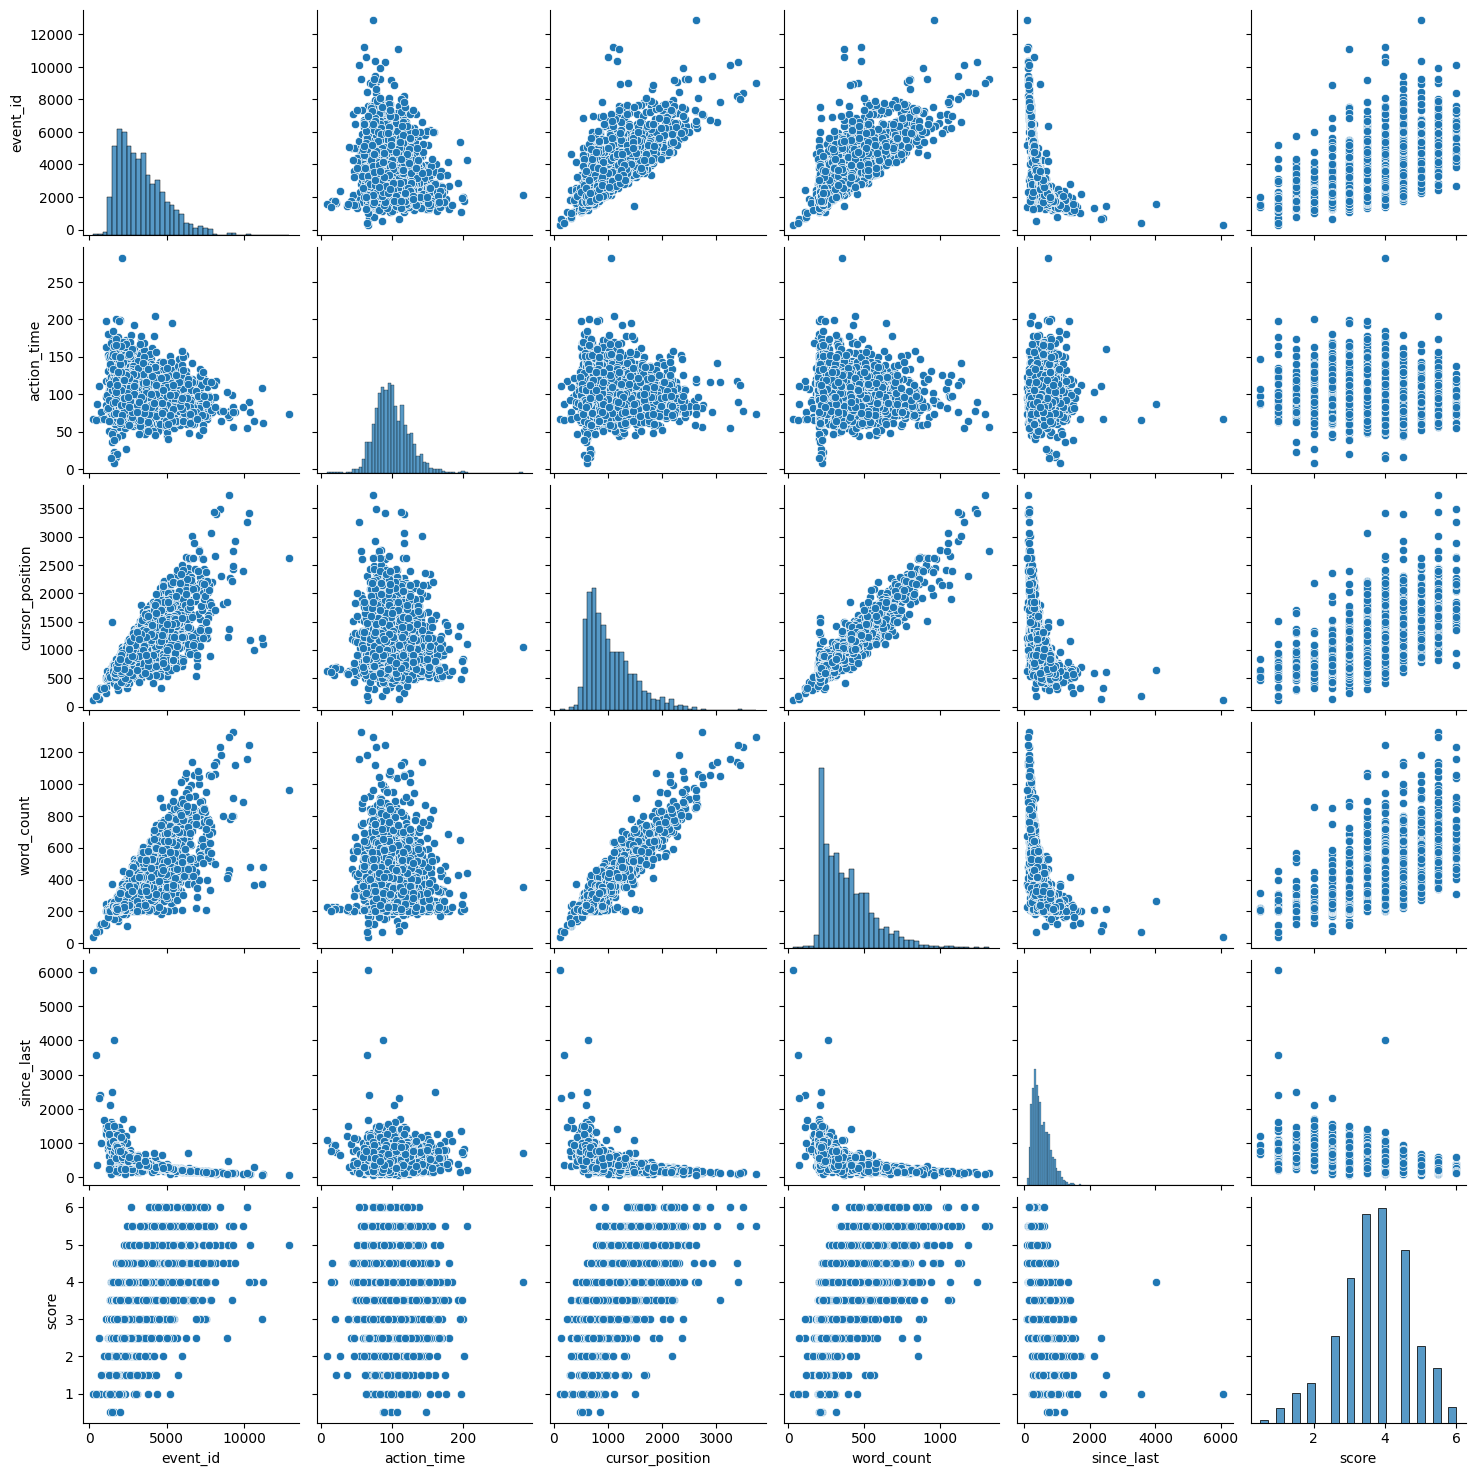

In [213]:
sns.pairplot(dfAgg.merge(targ, right_index=True, left_index=True))

<Axes: >

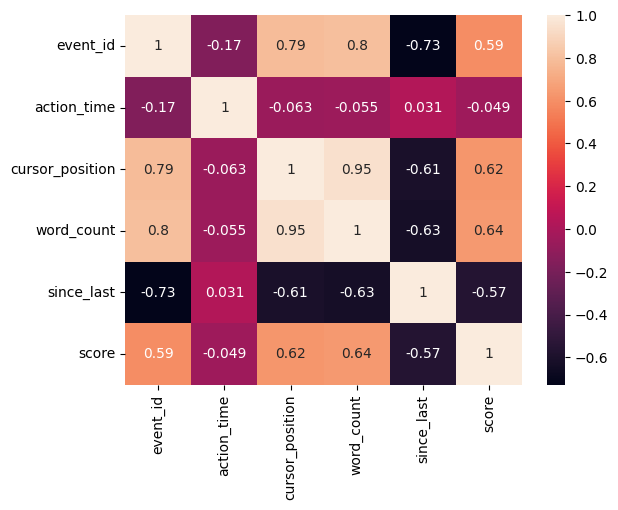

In [130]:
sns.heatmap(dfAgg.merge(targ, right_index=True, left_index=True).corr(), annot=True)

In [101]:
xtrain, xtest, ytrain, ytest = train_test_split(dfAgg, targ, test_size=.3)

In [102]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

In [151]:
sScalar = StandardScaler()
# sScalar.fit(dfAgg)

In [152]:
ytrain = ytrain['score']

KeyError: 'score'

In [195]:
mlp = MLPRegressor((28,100,14,6),verbose=True, max_iter=1000, learning_rate='adaptive',n_iter_no_change=10)
mlp.fit(xtrain, ytrain)

Iteration 1, loss = 128.81849727
Iteration 2, loss = 26.92491658
Iteration 3, loss = 6.91650887
Iteration 4, loss = 3.43708558
Iteration 5, loss = 1.98840084
Iteration 6, loss = 1.50443032
Iteration 7, loss = 1.24713389
Iteration 8, loss = 0.95448486
Iteration 9, loss = 0.85819803
Iteration 10, loss = 0.78725195
Iteration 11, loss = 0.75325993
Iteration 12, loss = 0.73404771
Iteration 13, loss = 0.66398283
Iteration 14, loss = 0.63215966
Iteration 15, loss = 0.62684339
Iteration 16, loss = 0.60349926
Iteration 17, loss = 0.58206878
Iteration 18, loss = 0.57208259
Iteration 19, loss = 0.55132994
Iteration 20, loss = 0.53979487
Iteration 21, loss = 0.51967160
Iteration 22, loss = 0.51577177
Iteration 23, loss = 0.53059278
Iteration 24, loss = 0.49391167
Iteration 25, loss = 0.49313712
Iteration 26, loss = 0.47838935
Iteration 27, loss = 0.47475739
Iteration 28, loss = 0.47828606
Iteration 29, loss = 0.47186230
Iteration 30, loss = 0.45417239
Iteration 31, loss = 0.45160842
Iteration 32, 

MLPRegressor(hidden_layer_sizes=(28, 100, 14, 6), learning_rate='adaptive',
             max_iter=1000, verbose=True)

In [196]:
mlpPred = mlp.predict(xtest)

In [193]:
from sklearn.metrics import root_mean_squared_error

In [197]:
root_mean_squared_error(ytest, mlpPred)

0.8976935963480395

In [176]:
from sklearn.dummy import DummyRegressor

In [198]:
dummy = DummyRegressor()
dummy.fit(xtrain, ytrain)

DummyRegressor()

In [199]:
root_mean_squared_error(ytest,dummy.predict(xtest))

1.012194287948909

In [200]:
from sklearn.linear_model import Ridge, ElasticNet

In [201]:
ridge = Ridge()
ridge.fit(xtrain, ytrain)

Ridge()

In [202]:
root_mean_squared_error(ytest, ridge.predict(xtest))

0.766234244796071

In [203]:
ortho = ElasticNet()
ortho.fit(xtrain, ytrain)

ElasticNet()

In [204]:
root_mean_squared_error(ytest, ortho.predict(xtest))

0.7648361004838506

In [205]:
pd.DataFrame(ytest).reset_index().drop('id',axis=1).merge(pd.DataFrame(mlpPred), left_index=True, right_index=True)

,score,0
0,2.0,3.822387
1,4.0,4.428636
2,4.0,4.086047
3,3.0,5.706271
4,3.0,2.932237
...,...,...
737,5.5,4.677028
738,2.5,3.908572
739,3.5,3.210088
740,2.5,3.525714


In [206]:
pd.DataFrame(ridge.predict(xtest))

,0
0,2.598802
1,3.812263
2,3.841074
3,5.541528
4,3.024690
...,...
737,4.268955
738,3.493574
739,2.934032
740,3.162262


In [207]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [208]:
forest = RandomForestRegressor()
forest.fit(xtrain, ytrain)

RandomForestRegressor()

In [209]:
root_mean_squared_error(ytest, forest.predict(xtest))

0.7551610385011138

In [210]:
svr = SVR()
svr.fit(xtrain, ytrain)

SVR()

In [211]:
root_mean_squared_error(ytest, svr.predict(xtest))

0.751015961449591